In [443]:
import pandas as pd

people = {
    "firstname":["Nikola","Bogdan","Sandra"],
    "lastname":["Djurkovic","Djurkovic","Lakic"],
    "email":["nikoladjurkovic12344@gmail.com","bogdandj93@gmail.com","sandradj94@gmail.com"]
}

df = pd.DataFrame(people)
df

#Stto znaci da name key predstavlja kolonu a value redove...Value mozemo pisati u obliku liste ili samog stringa

,firstname,lastname,email
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
1,Bogdan,Djurkovic,bogdandj93@gmail.com
2,Sandra,Lakic,sandradj94@gmail.com


In [444]:
#Ako zelimo da pozovemo samo odredjenu kolonu
df["email"]

0    nikoladjurkovic12344@gmail.com
1              bogdandj93@gmail.com
2              sandradj94@gmail.com
Name: email, dtype: object

In [445]:
#Laksi nacin pisanj je
df.email

0    nikoladjurkovic12344@gmail.com
1              bogdandj93@gmail.com
2              sandradj94@gmail.com
Name: email, dtype: object

In [446]:
# ljepsni nacin prikazivanja zasebnih kolona
df[["lastname","email"]]

,lastname,email
0,Djurkovic,nikoladjurkovic12344@gmail.com
1,Djurkovic,bogdandj93@gmail.com
2,Lakic,sandradj94@gmail.com


In [447]:
#da vidimo kolone
df.columns

Index(['firstname', 'lastname', 'email'], dtype='object')

In [448]:
#da vidinmo redove
df.iloc[0]

firstname                            Nikola
lastname                          Djurkovic
email        nikoladjurkovic12344@gmail.com
Name: 0, dtype: object

In [449]:
#a ako zelimo ljepse da prikazemo redove ili vise redova tada koristimo ovu funkciju
df.iloc[[0,1]]

,firstname,lastname,email
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
1,Bogdan,Djurkovic,bogdandj93@gmail.com


In [450]:
#Ako zelimo da vidimo samo mejlove ova dva reda(sto oznacava podlista 0,1) npr, email gledamo kao index 2
df.iloc[[0,1], [2]] #iloc se koristi kada pozicije numerisemo indeksima

,email
0,nikoladjurkovic12344@gmail.com
1,bogdandj93@gmail.com


In [451]:
#A samo loc koristimo kada poziciju oznacavamo njegovim stringo
df.loc[[0,1], ["email"]] #Mozemo zarezom da dodamo jos koju kolon

,email
0,nikoladjurkovic12344@gmail.com
1,bogdandj93@gmail.com


In [452]:
#Da provamo na primjeu
import pandas as pd

df1=pd.read_csv("C:/Users/Korisnik/Desktop/DataScience/Python/Podaci-za-analizu/Anketa-2023/survey_results_public.csv")
pd.set_option("display.max_columns", 85)
# preko df1.columns mozemo vidjeti koja nas kolona zanima
df1[["SOAccount"]]


,SOAccount
0,NaN
1,Yes
2,Yes
3,Yes
4,No
...,...
89179,Yes
89180,Yes
89181,NaN
89182,No


In [453]:
#Sada zelimo da znamo koliko ljudi je odgovorilo da ima acc na ovoj platformi, koliko da nema i koliko da nikad nije culo za nju
df1[["SOAccount"]].value_counts()

SOAccount              
Yes                        66282
No                         14618
Not sure/can't remember     6952
Name: count, dtype: int64

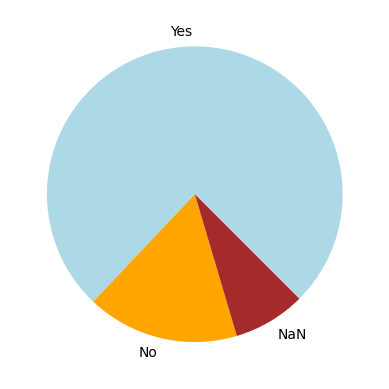

In [454]:
#i sada npr mozemo napraviti jedan jednostavan pie grafik
import matplotlib.pyplot as plt

answer = ["Yes","No","NaN"]
num = [66282,14618,6952]
color = ["LightBlue","Orange","Brown"]

plt.pie(num, labels=answer, colors=color, startangle=315)
plt.show()

In [455]:
#Ako nas interesuje prikazivanje odgovora samo do odredjenog broja redovaa i do odredjenog broja kolona
df1.loc[0:4,"SOAccount":"SOAI"]
# prikazuje od nultog do cetvtrog reda i od SPACC kolone do SOAI kolone


,SOAccount,SOPartFreq,SOComm,SOAI
0,NaN,NaN,NaN,NaN
1,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin..."
2,Yes,Less than once per month or monthly,Neutral,NaN
3,Yes,Less than once per month or monthly,"No, not really",I'm wearing of Stack Overflow using AI.
4,No,NaN,Neutral,Using AI to suggest better answer to my questi...


In [456]:
df.set_index("email") # Ako zelimo da email postavimo na prvo mjesto a ne na zadnje

,firstname,lastname
email,,
nikoladjurkovic12344@gmail.com,Nikola,Djurkovic
bogdandj93@gmail.com,Bogdan,Djurkovic
sandradj94@gmail.com,Sandra,Lakic


In [457]:
df["lastname"] == "Djurkovic" #filtriranje podataka

0     True
1     True
2    False
Name: lastname, dtype: bool

In [458]:
#Ako napravimo promjenjivu koja ce szvati filt i raditi istu funkciju
filt=(df["lastname"] == "Djurkovic")

In [459]:
#Sad ako pokrenemo tu funkciju kao dataframe dobicemo samo redove koji su ekvivalentni "Djurkovic"
df[filt]


,firstname,lastname,email
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
1,Bogdan,Djurkovic,bogdandj93@gmail.com


In [460]:
#Mzemo isto napisati i sa loc funkcijom
df.loc[filt]

,firstname,lastname,email
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
1,Bogdan,Djurkovic,bogdandj93@gmail.com


In [461]:
#Takodje ako zelimo da znamo mejlove prezimena djurkovic koristimo istu fnukciju sa malom izmjenom
df.loc[filt,"email"]

0    nikoladjurkovic12344@gmail.com
1              bogdandj93@gmail.com
Name: email, dtype: object

In [462]:
#Takodje, ukoliko zemlimo da filtriramo podatak samo jedne osobe, funkciju iz 55 celije cemo malo izmijenitit
filt1=(df["lastname"] == "Djurkovic") & (df["firstname"] == "Nikola")
df.loc[filt1] #Ako zelimo samo prikaz email-a, dodacemo "email" u zagradu

,firstname,lastname,email
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com


In [463]:
#Takodje, mozemo istu funkciju da iskoristimo ali umjesto znaka & da stavimo |(ili) ako zelimo da filtriramo vise korisnika
filt2=(df["lastname"] == "Lakic") | (df["firstname"] == "Nikola")
df.loc[filt2]

,firstname,lastname,email
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
2,Sandra,Lakic,sandradj94@gmail.com


In [464]:
#Ako zelimo da prikazmeo sve sto nije filter obuhvatio, koristimo negativni filter koji se oznacava ~filt2
df.loc[~filt2]

,firstname,lastname,email
1,Bogdan,Djurkovic,bogdandj93@gmail.com


In [465]:
#Da probamo ovo primjeniti na primjeru
df1

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back

In [466]:
high_salary = (df1["ConvertedCompYearly"] > 10319366.0) #filter mi daje sve ispitanike koji su rekli da im je plata godisnja preko ovog iznosa dolara
df1.loc[high_salary]

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
19679,19680,I agree,I am a developer by profession,25-34 years old,"Employed, part-time",Remote,Professional development or self-paced learnin...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Other (please specify):,NaN,NaN,9,3,Developer Experience,"Just me - I am a freelancer, sole proprietor, ...",I have little or no influence,NaN,Other (please specify):,Mali,XOF\tWest African CFA franc,2.239672e+10,Ada,Ada,BigQuery,BigQuery,Amazon Web Services (AWS),Amazon Web Services (AWS),Angular,Angular,.NET (5+),.NET (5+),Ansible,Ansible,Android Studio,Android Studio,AIX,AIX,Adobe Workfront,Adobe Workfront,Cisco Webex Teams,Cisco Webex Teams,Andi,Andi,Adrenaline,Adrenaline,Collectives on Stack Overflow,Less than once per month or monthly,Yes,I have never participated in Q&A on Stack Over...,Neutral,Profossionnal,Yes,Very favorable,Other (please explain),Highly trust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,36573181.0
28121,28122,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Professional development or self-paced learnin...,Primary/elementary school,Books / Physical media;Other online resources ...,Recorded coding sessions;Written-based Online ...,NaN,4,7,NaN,20 to 99 employees,I have little or no influence,NaN,Research companies that have advertised on sit...,Thailand,THB\tThai baht,2.000000e+09,Ada,Nim;Objective-C;OCaml;Perl,NaN,NaN,NaN,NaN,Angular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Daily or almost daily,Not sure/can't remember,NaN,Neutral,Freedom,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,25.0,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,15-30 minutes a day,Continuous integration (CI) and (more often) c...,Financial Services,Appropriate in length,Difficult,57513831.0
53268,53269,I agree,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Boots...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Friend or family member;Online Courses or Cert...,Formal documentation provided by the owner of ...,NaN,3,Less than 1 year,"Developer, full-stack",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,Canada,CAD\tCanadian dollar,1.000000e+08,Bash/Shell (all shells);HTML/CS

In [467]:
#Sad ako zelimo samo posebne kolone da prikazemo od ovih korisnika, to cemo raditi ovako
df1.loc[high_salary,["Country","Industry","ConvertedCompYearly"]]

,Country,Industry,ConvertedCompYearly
19679,Mali,NaN,36573181.0
28121,Thailand,Financial Services,57513831.0
53268,Canada,"Information Services, IT, Software Development...",74351432.0
55102,Ethiopia,NaN,17612921.0
66223,Australia,NaN,72714292.0
77848,South Africa,Other,73607918.0
80586,United States of America,NaN,11000000.0


In [468]:
#Ako zelim samo odredjene drzave da mi se prikaze iz cijelog fajla, naprvicu listu i koristiti sledecu funkciju
countrys=["Africa","South Africa","Canada"]
filt = df1["Country"].isin(countrys)
df1.loc[filt,"Country"]

25       South Africa
40             Canada
45             Canada
114            Canada
140            Canada
             ...     
89142          Canada
89148          Canada
89155          Canada
89157          Canada
89169    South Africa
Name: Country, Length: 4080, dtype: object

In [469]:
df1["Industry"] #Zelim da izdvojim samo IT strucnjake

0                                                      NaN
1        Information Services, IT, Software Development...
2        Information Services, IT, Software Development...
3                                                      NaN
4                                                    Other
                               ...                        
89179                                                  NaN
89180                                                  NaN
89181                                                  NaN
89182                                                  NaN
89183    Information Services, IT, Software Development...
Name: Industry, Length: 89184, dtype: object

In [470]:
filt1=df1["Industry"].str.contains("IT", na=False)
df1.loc[filt1, "Industry"]

1        Information Services, IT, Software Development...
2        Information Services, IT, Software Development...
6        Information Services, IT, Software Development...
13       Information Services, IT, Software Development...
19       Information Services, IT, Software Development...
                               ...                        
89165    Information Services, IT, Software Development...
89171    Information Services, IT, Software Development...
89172    Information Services, IT, Software Development...
89175    Information Services, IT, Software Development...
89183    Information Services, IT, Software Development...
Name: Industry, Length: 18159, dtype: object

In [471]:
#Ako na primjer upisemo samo filt1, dobicemo true,folse vrijednosti
filt1

0        False
1         True
2         True
3        False
4        False
         ...  
89179    False
89180    False
89181    False
89182    False
89183     True
Name: Industry, Length: 89184, dtype: bool

In [472]:
#A ako napisemo u ovoj formi , dobicemo sve podatke o ljudima koji su u IT sektoru
df1.loc[filt1]

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.850000e+05,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,2.500000e+05,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Em

In [473]:
#Ako zelimo da mijenjamo kolonu, tj da mijenjamo naziv, koristicemo funkciju i promijeniti u kracioblik u odnosu na prvu verziju
df.columns = ["First","Last","Email"]
df

,First,Last,Email
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
1,Bogdan,Djurkovic,bogdandj93@gmail.com
2,Sandra,Lakic,sandradj94@gmail.com


In [474]:
df.columns = [x.upper() for x in df.columns] # na ovaj nacin uz pomoc for petlje povecacemo slova kolona
df

,FIRST,LAST,EMAIL
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
1,Bogdan,Djurkovic,bogdandj93@gmail.com
2,Sandra,Lakic,sandradj94@gmail.com


In [475]:
df.rename(columns = {"FIRST":"FIRSTNAME","LAST":"LASTNAME"}, inplace=True)
#Ova funkcija ce promjeniti imena kolona 
'''inplace=True je argument koji se može koristiti s određenim metodama u Pandasu 
kako bi se promjene odmah primijenile na postojeći objekt, umjesto stvaranja novog 
objekta s promjenama. To znači da ne morate dodjeljivati rezultat natrag
varijabli - promjene će se dogoditi izravno na originalnom objektu.
Primjerice, kada koristite inplace=True s nekom od metoda poput pd.DataFrame.drop ili 
pd.DataFrame.rename, to znači da će se promjene odmah odraziti na originalnom DataFrame-u,
 a ne da će vam metoda vratiti novi DataFrame.'''
df

,FIRSTNAME,LASTNAME,EMAIL
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
1,Bogdan,Djurkovic,bogdandj93@gmail.com
2,Sandra,Lakic,sandradj94@gmail.com


In [476]:
df.loc[2] = ["Sandra","Djurkovic","sandradj94@gmail.com"] # Na ovaj nacin mijenjamo zeljenu kolonu
df

,FIRSTNAME,LASTNAME,EMAIL
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
1,Bogdan,Djurkovic,bogdandj93@gmail.com
2,Sandra,Djurkovic,sandradj94@gmail.com


In [477]:
# Ako zelimo da mijenjamo samo jednu stavku iz tabele, ili dvije..., koristicemo sledecu funkciju
df.loc[2, ["LASTNAME"]] = ["Lakic"]
df

,FIRSTNAME,LASTNAME,EMAIL
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
1,Bogdan,Djurkovic,bogdandj93@gmail.com
2,Sandra,Lakic,sandradj94@gmail.com


In [478]:
#Ako zelimo na primjer da na u email stoje sve malaveliak slova, koristimo funkciju
df["EMAIL"] = df["EMAIL"].str.upper()
df

,FIRSTNAME,LASTNAME,EMAIL
0,Nikola,Djurkovic,NIKOLADJURKOVIC12344@GMAIL.COM
1,Bogdan,Djurkovic,BOGDANDJ93@GMAIL.COM
2,Sandra,Lakic,SANDRADJ94@GMAIL.COM


In [479]:
#APPLY funkcija, funkcionise na ovaj nacin
df["EMAIL"].apply(len)


0    30
1    20
2    20
Name: EMAIL, dtype: int64

In [480]:
#Kad bi npr definisali funkciju koja ce sve email-ove napisati malim slovima, to bi izgledalo ovako
def update_email(email):
    return email.lower()

#Zatim koristimo apply funkciju da vidmo kako ce to izgledati
df["EMAIL"].apply(update_email)

0    nikoladjurkovic12344@gmail.com
1              bogdandj93@gmail.com
2              sandradj94@gmail.com
Name: EMAIL, dtype: object

In [481]:
df["EMAIL"] = df["EMAIL"].apply(update_email) #Zatim ovaj nacin pisanja koristimo kako bi zvanicno napravili izmjenu u tabeli
df

,FIRSTNAME,LASTNAME,EMAIL
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com
1,Bogdan,Djurkovic,bogdandj93@gmail.com
2,Sandra,Lakic,sandradj94@gmail.com


In [482]:
df.applymap(len) #zelimo da vidimo koliko svako polje ima stringova

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_5184\1381065256.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(len) #zelimo da vidimo koliko svako podlje ima stringova


,FIRSTNAME,LASTNAME,EMAIL
0,6,9,30
1,6,9,20
2,6,5,20


In [483]:
'''Takodje mozemo sa applymap funkcijom sva slova da smanjimo.Sto znaci da apply koristimo za pojedinacne
 elemente, kolone ili redove a applymap za celokupnu tabelu'''
df.applymap(str.lower)

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_5184\201738796.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(str.lower)


,FIRSTNAME,LASTNAME,EMAIL
0,nikola,djurkovic,nikoladjurkovic12344@gmail.com
1,bogdan,djurkovic,bogdandj93@gmail.com
2,sandra,lakic,sandradj94@gmail.com


In [484]:
#Ako zelimo da dodamo novu kolonu radicemo to ovako
df["FULLNAME"] = df["FIRSTNAME"] + " " + df["LASTNAME"]
df

,FIRSTNAME,LASTNAME,EMAIL,FULLNAME
0,Nikola,Djurkovic,nikoladjurkovic12344@gmail.com,Nikola Djurkovic
1,Bogdan,Djurkovic,bogdandj93@gmail.com,Bogdan Djurkovic
2,Sandra,Lakic,sandradj94@gmail.com,Sandra Lakic


In [485]:
#Pak ako zelimo da izbrisemo kolonu uradicemo to ovako
df.drop(columns=["FIRSTNAME","LASTNAME"], inplace = True)



In [486]:
df

,EMAIL,FULLNAME
0,nikoladjurkovic12344@gmail.com,Nikola Djurkovic
1,bogdandj93@gmail.com,Bogdan Djurkovic
2,sandradj94@gmail.com,Sandra Lakic


In [487]:
#Ako zelimo da vratmo firtnema i lastname kolnu
df[["FIRSTNAME", "LASTNAME"]] = df["FULLNAME"].str.split(" ", expand = True)
#expand=True znači da će rezultat biti DataFrame s jednim stupcem za svaki rezultat nakon razdvajanja.

In [488]:
df

,EMAIL,FULLNAME,FIRSTNAME,LASTNAME
0,nikoladjurkovic12344@gmail.com,Nikola Djurkovic,Nikola,Djurkovic
1,bogdandj93@gmail.com,Bogdan Djurkovic,Bogdan,Djurkovic
2,sandradj94@gmail.com,Sandra Lakic,Sandra,Lakic


In [489]:
#Kada zelimo da dodajemo redove, tada koristimo funkcije za serije ili liste
#ignore_index=True, što znači da će Pandas generirati novi indeks za dodani redak. 

df = df._append({'EMAIL': 'novi@email.com', 'FULLNAME': 'Ime Prezime', 'FIRSTNAME': 'Ime', 'LASTNAME': 'Prezime'}, ignore_index=True)

df

,EMAIL,FULLNAME,FIRSTNAME,LASTNAME
0,nikoladjurkovic12344@gmail.com,Nikola Djurkovic,Nikola,Djurkovic
1,bogdandj93@gmail.com,Bogdan Djurkovic,Bogdan,Djurkovic
2,sandradj94@gmail.com,Sandra Lakic,Sandra,Lakic
3,novi@email.com,Ime Prezime,Ime,Prezime


In [490]:
people = {
    'first': ['Tony', 'Steve'], 
    'last': ['Stark', 'Rogers'], 
    'email': ['IronMan@avenge.com', 'Cap@avenge.com']
}
df2 = pd.DataFrame(people)
df2
#Sada cemo df2 da dodamo na df

,first,last,email
0,Tony,Stark,IronMan@avenge.com
1,Steve,Rogers,Cap@avenge.com


In [491]:
df = df._append(df2, ignore_index=True, sort=False)
df

,EMAIL,FULLNAME,FIRSTNAME,LASTNAME,first,last,email
0,nikoladjurkovic12344@gmail.com,Nikola Djurkovic,Nikola,Djurkovic,NaN,NaN,NaN
1,bogdandj93@gmail.com,Bogdan Djurkovic,Bogdan,Djurkovic,NaN,NaN,NaN
2,sandradj94@gmail.com,Sandra Lakic,Sandra,Lakic,NaN,NaN,NaN
3,novi@email.com,Ime Prezime,Ime,Prezime,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Tony,Stark,IronMan@avenge.com
5,NaN,NaN,NaN,NaN,Steve,Rogers,Cap@avenge.com


In [493]:
#Ako zelimo da izbrisemo Stiva jer vise volimo IronMan-a
df=df.drop(index=5)
df

,EMAIL,FULLNAME,FIRSTNAME,LASTNAME,first,last,email
0,nikoladjurkovic12344@gmail.com,Nikola Djurkovic,Nikola,Djurkovic,NaN,NaN,NaN
1,bogdandj93@gmail.com,Bogdan Djurkovic,Bogdan,Djurkovic,NaN,NaN,NaN
2,sandradj94@gmail.com,Sandra Lakic,Sandra,Lakic,NaN,NaN,NaN
3,novi@email.com,Ime Prezime,Ime,Prezime,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Tony,Stark,IronMan@avenge.com


In [494]:
filt = df['LASTNAME'] == 'Djurkovic'
#bukvalno smo mu rekli da nadje sva djurkovic prezimena
df = df.drop(index=df[filt].index)
#Zatim smo mu rekli da svim tim mjestima dodijeli index funkcijom(.index), a zatim da ih izbrise
df

,EMAIL,FULLNAME,FIRSTNAME,LASTNAME,first,last,email
2,sandradj94@gmail.com,Sandra Lakic,Sandra,Lakic,NaN,NaN,NaN
3,novi@email.com,Ime Prezime,Ime,Prezime,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Tony,Stark,IronMan@avenge.com
